<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/MOD39_EXERCICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [8]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from google.colab import files
import io

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
print(df.head())

Saving CARRO_CLIENTES.csv to CARRO_CLIENTES.csv
   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0


In [3]:
print("--- Info da Base ---")
print(df.info())
print("\nDados Faltantes:\n", df.isnull().sum())

df.drop('User ID', axis=1, inplace=True)

--- Info da Base ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None

Dados Faltantes:
 User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [4]:
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])
df.drop('Gender', axis=1, inplace=True)

# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

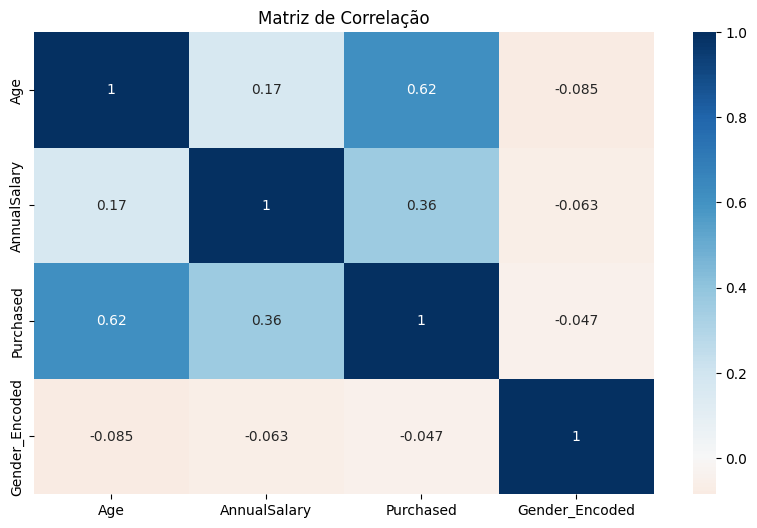

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', center=0)
plt.title("Matriz de Correlação")
plt.show()

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [6]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [9]:
# Hiperparâmetros escolhidos: max_depth (profundidade) e eta (learning rate)
modelo = XGBClassifier(
    max_depth=3,
    eta=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss'
)
modelo.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [16:44:39] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [10]:
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [11]:
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))


--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       138
           1       0.90      0.85      0.88       112

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?


Não, elas não são necessariamente as mesmas. Embora variáveis com alta correlação geralmente apareçam como importantes no modelo, os resultados divergem pelos seguintes motivos:

Relações Lineares vs. Não Lineares: A matriz de correlação só percebe se uma variável cresce de forma constante com a outra. O XGBoost consegue identificar "saltos" (ex: a chance de compra dispara apenas após os 45 anos, mas é estável antes disso).

Interações entre Variáveis: O XGBoost percebe se o Salário só passa a ser importante quando a Idade é alta. A correlação analisa cada variável sozinha, de forma isolada.

Sensibilidade ao Ruído: A correlação é mais afetada por valores discrepantes (outliers), enquanto o XGBoost é mais robusto e foca no que realmente ajuda a "decidir" o resultado.

Age e AnnualSalary dominam ambos os rankings, mas a ordem e o "peso" dado a cada uma será diferente entre a matriz e o modelo final. O XGBoost costuma dar um destaque muito maior à Age.

In [12]:
importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n--- Feature Importance ---")
print(importancias)


--- Feature Importance ---
Age               0.625969
AnnualSalary      0.315999
Gender_Encoded    0.058032
dtype: float32
